We start with a question: why are RNNs (depspite being universal approximators / supposedly Turing Complete) are difficult to train with 1st order gradient based methods (eg SGD as we're using)? 
> The Key is understanding the behavior of gradients and activations during training. 

### Weight Initialization:

The initialization of weights in a neural network is crucial because it sets the starting point for the optimization process during training. The choice of initial weights can significantly impact the network's ability to learn effectively and efficiently. Here are a few reasons why weight initialization matters:

1. **Symmetry Breaking**: If all the weights in a neural network are initialized to the same value (e.g., zero), the network may fail to break symmetry during training. This means that all the neurons in a layer will compute the same output, and the gradients will be the same for all the weights. As a result, the network will not learn meaningful features and will not converge to a good solution.

Example: Imagine you have a neural network with one hidden layer containing three neurons. If you initialize all the weights to the same value, say 0, the neurons in the hidden layer will receive the same input and compute the same output. For example:
   - Input: [1, 2, 3]
   - Weights: [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
   - Output: [0, 0, 0]

As a result, during backpropagation, the gradients for all the weights will be the same. This means that all the weights will be updated in the same way, and the neurons will continue to compute the same output in the next iteration. The network will fail to learn meaningful features and will not converge to a good solution.

**You want some entropy / randomness on initialization**

2. **Gradient Flow**: The initialization of weights affects the magnitude of the gradients during backpropagation:
- If the weights are initialized too small, the gradients may become very small as they propagate through the layers, leading to the vanishing gradient problem. This can slow down or even prevent the network from learning.
- On the other hand, if the weights are initialized too large, the gradients may explode, causing the network to diverge and fail to converge.

Example: consider a MLP. If the weights are initialized too small, the gradients may become very small as they propagate through the layers. For example:
   - Layer 1 weights: [[0.01, 0.01], [0.01, 0.01]]
   - Layer 2 weights: [[0.01, 0.01], [0.01, 0.01]]

If the gradients in layer 2 are [0.1, 0.1], after multiplying with the small weights, the gradients in layer 1 become [0.001, 0.001]. As the gradients become smaller and smaller, the updates to the weights become insignificant, leading to the vanishing gradient problem.

On the other hand, if the weights are initialized too large, the gradients may explode. For example:
   - Layer 1 weights: [[10, 10], [10, 10]]
   - Layer 2 weights: [[10, 10], [10, 10]]

If the gradients in layer 2 are [1, 1], after multiplying with the large weights, the gradients in layer 1 become [100, 100]. The gradients keep increasing exponentially, causing the network to diverge and fail to converge.

**U don't want weights too small or too large**

3. **Convergence Speed**: The choice of initial weights can impact the speed of convergence during training. If the weights are initialized properly, the network can converge faster to a good solution. Poor initialization can lead to slower convergence or even getting stuck in suboptimal solutions.

Example: Suppose you have a neural network trying to learn a simple function, such as y = 2x. If the weights are initialized close to the optimal values, the network can converge quickly. For example:
   - Initial weights: [[1.9, 2.1], [1.8, 2.2]]
   - Optimal weights: [[2, 2], [2, 2]]

The network will start with weights close to the optimal solution and can fine-tune them quickly during training.

However, if the weights are initialized far from the optimal values, the network may take longer to converge or get stuck in suboptimal solutions. For example:
   - Initial weights: [[0.1, 0.2], [0.3, 0.4]]
   - Optimal weights: [[2, 2], [2, 2]]

The network will start with weights far from the optimal solution and may require many iterations to converge, or it may get stuck in a suboptimal solution.

4. **Avoiding Saturation**: Certain activation functions, such as the sigmoid or tanh, can saturate (become very close to 0 or 1 or -1 and 1) if the input values are too large or too small. If the weights are initialized inappropriately, it can cause the activations to be in the saturated regions, making it difficult for the network to learn and update the weights effectively.

Example: Activation functions like sigmoid and tanh have saturated regions where the output becomes very close to 0 or 1 (for sigmoid) or -1 or 1 (for tanh). If the weights are initialized inappropriately, causing the inputs to the activation functions to be very large or very small, the activations will be in the saturated regions.

For example, let's consider a sigmoid activation function:
   - Input: [10, 10, 10]
   - Weights: [[1, 1, 1], [1, 1, 1], [1, 1, 1]]
   - Output: [0.9999, 0.9999, 0.9999]

In this case, the activations are saturated, and the gradients will be very small. This makes it difficult for the network to learn and update the weights effectively.

To avoid saturation, the weights should be initialized in a way that keeps the activations in the non-saturated regions of the activation functions.

Remember how we computed the gradient for `tanh`:
```
def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    
    def _backward():
      self.grad += (1 - t**2) * out.grad <<-look here
    out._backward = _backward
    
    return out
```

We can see $grad = (1 - t^2) * out.grad$ if $t = -1$ or $t = 1$ then $(1 - t^2) = 0$. The gradient from the previous layer `out.grad` won't propagate. The situation is not very different for values of $t$ very close to 1 or -1.

When will saturation be more likely (ie when does $tanh(x)$ come close to -1 or 1? 
> Where $x$ has high values.

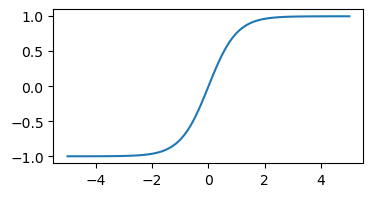

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5,5,100)
y = np.tanh(x)

plt.figure(figsize=(4,2))
plt.plot(x, y);

In [2]:
np.tanh(2), np.tanh(-2)

(0.9640275800758169, -0.9640275800758169)

To address these issues, various **weight initialization techniques** have been proposed. Some common techniques include:

- Xavier/Glorot Initialization: This method initializes the weights based on the number of input and output units in each layer, aiming to keep the variance of the activations and gradients consistent across layers.

- He Initialization: This method is particularly effective for networks with ReLU activations. It initializes the weights based on the number of input units, helping to maintain the variance of the activations through the network.

- Random Initialization: Initializing weights with small random values drawn from a uniform or normal distribution can help break symmetry and allow the network to learn diverse features.

The choice of initialization technique depends on the specific architecture, activation functions, and problem at hand. Proper weight initialization can significantly improve the training process and the final performance of the neural network.

### Activtions (layer outputs) and their distributions:

**Computing Activations (repeat multiplication of Gaussians):**

In a neural network, as the activations $(wx + b)$ are computed through repeated matrix multiplications, the standard deviation of the activations can change significantly. This phenomenon is known as the "variance explosion" or "variance shrinkage" problem, depending on whether the standard deviation increases or decreases.

Suppose we have a neural network with three layers.
The standard deviation of the activations can change based on the initialization of the weight matrices.

In [3]:
# Example where std stays 0
x = np.array([1, 1])

W1_example1 = np.array([[1.0, 0.5],
                        [0.5, 1.0]])

W2_example1 = np.array([[0.8, 0.6],
                        [0.6, 0.8]])

W3_example1 = np.array([[1.2, 0.9],
                        [0.9, 1.2]])

# # forward pass
a1_example1 = np.dot(W1_example1, x)
a2_example1 = np.dot(W2_example1, a1_example1)
a3_example1 = np.dot(W3_example1, a2_example1)

print(a1_example1.std(), a2_example1.std(), a3_example1.std())

0.0 0.0 0.0


If the weight matrices are initialized with larger values or have a higher variance, the standard deviation of the activations will increase as they are multiplied together. This is known as the "variance explosion" problem.

In [4]:
# example
x = np.array([1,1.])
W1_explosion = np.array([[2.0, 3.0],
                         [4.0, 5.0]])

W2_explosion = np.array([[6.6, 7.2],
                         [9.2, 8.6]])

W3_explosion = np.array([[10.4, 11.8],
                         [13.8, 12.4]])

# # forward pass
a1_explosion = np.dot(W1_explosion, x)
a2_explosion = np.dot(W2_explosion, a1_explosion)
a3_explosion = np.dot(W3_explosion, a2_explosion)

print(a1_explosion.std(), a2_explosion.std(), a3_explosion.std())

2.0 12.799999999999997 203.2800000000002


On the other hand, if the weight matrices are initialized with smaller values or have a lower variance, the standard deviation of the activations will decrease as they are multiplied together. This is known as the "variance shrinkage" problem.

In [5]:
W1_shrinkage = np.array([[0.5, 1.25],
                         [2.25, 0.5]])

W2_shrinkage = np.array([[0.4, 0.3],
                         [0.3, 0.4]])

W3_shrinkage = np.array([[0.6, 0.45],
                         [0.45, 0.6]])

# forward pass
a1_shrinkage = np.dot(W1_shrinkage, x)
a2_shrinkage = np.dot(W2_shrinkage, a1_shrinkage)
a3_shrinkage = np.dot(W3_shrinkage, a2_shrinkage)

a1_shrinkage.std(), a2_shrinkage.std(), a3_shrinkage.std()

(0.5, 0.050000000000000044, 0.007499999999999951)

Information Propagation:

The activations carry information forward through the network. If the activations are too small or too sparse, information may not propagate effectively to subsequent layers. This can limit the network's ability to learn and capture complex patterns.

For example, consider a network with ReLU activations:
   - Layer 1: wx + b = [-1, -2, -3]
   - ReLU activations: [0, 0, 0]

If most of the activations are zero due to the ReLU function, the information from the input may not propagate effectively to the next layer, hindering the learning process.

To mitigate these issues, various techniques are used:

- Weight Initialization: Proper weight initialization techniques, such as Xavier/Glorot initialization or He initialization, help ensure that the activations have a suitable distribution and variance across layers.

- Batch Normalization: Batch normalization is a technique that normalizes the activations within each mini-batch, reducing the impact of covariate shift and allowing the network to converge faster.

- Activation Function Choice: The choice of activation function can influence the distribution and sparsity of activations. Functions like ReLU, Leaky ReLU, and ELU can help alleviate the vanishing gradient problem and promote information propagation.


Let's write some code to see what happens in action.

### Code

The starting code will be the same code we used to train MLP before.

In [6]:
import torch
import torch.nn.functional as F

In [7]:
words = open("names.txt").read().splitlines()
len(words), words[: 5]

(32033, ['emma', 'olivia', 'ava', 'isabella', 'sophia'])

In [8]:
vocab = sorted(set(''.join(words)))
stoi = {s:i+1 for i,s in enumerate(vocab)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

block_size = 3

In [9]:
def build_dataset(words):
    xs, ys = [], []
    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            xs.append(context)
            ys.append(ix)
            context = context[1: ] + [ix]
    X = torch.tensor(xs)
    Y = torch.tensor(ys)

    print(X.shape, Y.shape)
    return X, Y

In [10]:
xs, ys = build_dataset(words[:5])

torch.Size([32, 3]) torch.Size([32])


In [11]:
# train / dev / test split
import random

random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

x_train, y_train = build_dataset(words[:n1])
x_dev, y_dev = build_dataset(words[n1:n2])
x_test, y_test = build_dataset(words[n2:])

torch.Size([182524, 3]) torch.Size([182524])
torch.Size([22891, 3]) torch.Size([22891])
torch.Size([22731, 3]) torch.Size([22731])


In [12]:
# build the MLP

emb_size = 2
n_hidden = 100

C = torch.randn(len(stoi), emb_size)
W1 = torch.randn(emb_size * block_size, n_hidden)
b1 = torch.randn(n_hidden)
W2 = torch.randn(n_hidden, len(stoi))
b2 = torch.randn(len(stoi))

parameters = [C, W1, W2, b1, b2]

lossi = []
stepi = []

In [13]:
for p in parameters:
    p.requires_grad = True

In [14]:
for i in range(100):
    ixs = torch.randint(0, x_train.shape[0], (32, ))
    xs = x_train[ixs]; ys = y_train[ixs]
    
    xenc = C[xs]
    hpreacts = xenc.view(-1, emb_size * block_size) @ W1 + b1
    h = torch.tanh(hpreacts)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, ys)
    lr = 0.1
    for p in parameters:
        p.grad = None
    loss.backward()
    for p in parameters:
        p.data += - lr * p.grad

    # keep stats
    lossi.append(loss.item())
    stepi.append(i)

    if i > 1:
        break
    if i % 10 == 0:
        print(loss.item())

16.761199951171875


In [15]:
# plt.figure(figsize=(4,3))
# plt.plot(stepi, lossi); 

**How weight initialization affects loss**

Weight initialization also affects our initial loss. How do we know? We can see the very rapid drop that occurs initially before it slows down (the plot has this hockey stick appearance).

Why do we suppose it isn't right? 

Consider the example we're working with: we have 27 characters and we try to predict the next one. At the start, we have no reason to assume one character is more likely than any other ie: probability of any charactere should be 1/27. What loss should come out of this probability? 

In [16]:
-np.log(1/27)

3.295836866004329

This tells us our model is very far off. This happens because if the logits in the final layer are not equally distributed, then our correct character has 1/27 chance of being by chance given a high number vs 26 other characters which results in high loss.

In [17]:
hpreacts.shape

torch.Size([32, 100])

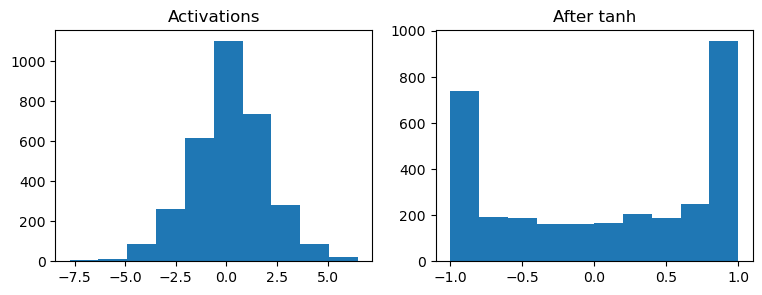

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(9,3))
axs[0].hist(hpreacts.view(-1).detach().numpy());
axs[1].hist(h.view(-1).detach().numpy());

axs[0].set_title("Activations");
axs[1].set_title("After tanh");

In [19]:
hpreacts.min(), hpreacts.max()

(tensor(-7.7428, grad_fn=<MinBackward1>),
 tensor(6.4985, grad_fn=<MaxBackward1>))

We can see activations have very wide range ~ (-9, 9) which results in high saturation of tanh (many values close to -1 and 1). We're not having major problems in this example because it's a very small network and small example so we're still able to learn. 

### Solution 1: Scaling weights and biases at initialization by sqrt(fan_in) a.k.a num inputs

In [20]:
# build the MLP
block_size = 3
emb_size = 2
n_hidden = 100

C = torch.randn(len(stoi), emb_size)
W1 = torch.randn(emb_size * block_size, n_hidden) * 5/3 / ((emb_size * block_size)**0.5)
b1 = torch.randn(n_hidden) * 0.01
W2 = torch.randn(n_hidden, len(stoi)) * 0.01
b2 = torch.randn(len(stoi)) * 0

parameters = [C, W1, W2, b1, b2]

lossi = []
stepi = []

This multiplication `W1 = ... * 5/3 / ((emb_size * block_size)**0.5)` is in effect scaling down the standard deviation of this gaussian weight distribution. 

In torch, `torch.randn(1000) * 0.2` the 0.2 ends up being the standard deviation of this distribution. 

In [21]:
for p in parameters:
    p.requires_grad = True

for i in range(100):
    ixs = torch.randint(0, x_train.shape[0], (32, ))
    xs = x_train[ixs]; ys = y_train[ixs]
    
    xenc = C[xs]
    hpreacts = xenc.view(-1, emb_size * block_size) @ W1 + b1
    h = torch.tanh(hpreacts)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, ys)
    lr = 0.1
    for p in parameters:
        p.grad = None
    loss.backward()
    for p in parameters:
        p.data += - lr * p.grad

    # keep stats
    lossi.append(loss.item())
    stepi.append(i)

    if i > 1:
        break
    if i % 10 == 0:
        print(loss.item())

3.306441307067871


When we scale down the weights W2 (make the last layer less confident) we get the desired initial loss as 1/27.

When we scale down W1 we get less widespread activations and more well-behaved at tanh.

When activations are well behaved in forward pass, this makes gradients also well-behaved.

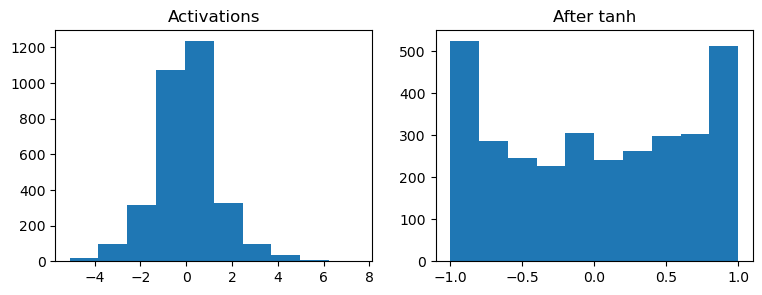

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(9,3))
axs[0].hist(hpreacts.view(-1).detach().numpy());
axs[1].hist(h.view(-1).detach().numpy());

axs[0].set_title("Activations");
axs[1].set_title("After tanh");

### Solution 2: Normalization

We've seen what impact the activations could have on our network learning:
- Too small and tanh won't learn anything
- Too large and tanh will be saturated and gradients won't flow.

We want our activations throughout the network to be roughly normally distributed. To do so, it won't be fesible to keep doing this by hand as we did above especially when the networks become deeper. 

Solution: if we want activations normally distributed, why not just normalize them at each training loop. 

NB: Keep in mind, normalization is constraining their values and thus contrains learning. We thus will give them some free parameters to learn (scale and shift parameters). 

NB: When doing inference, we want to pass one example through the network and get out a prediction. If we incorporate a normalization step over batches during training, we'll need to similarily pass a batch during inference. To avoid this, compute running mean and variance and use them at inference time.

In [23]:
emb_size = 2
n_hidden = 100

C = torch.randn(len(stoi), emb_size)
W1 = torch.randn(emb_size * block_size, n_hidden) * 5/3 / ((emb_size * block_size)**0.5)
# b1 = torch.randn(n_hidden) * 0.01 -> no longer necessary since we're normalizing
W2 = torch.randn(n_hidden, len(stoi)) * 0.01
b2 = torch.randn(len(stoi)) * 0

# for batchnorm
bngain = torch.ones((1, n_hidden))
bnbias = torch.zeros((1, n_hidden))

parameters = [C, W1, W2, b2, bngain, bnbias]

lossi = []
stepi = []

# compute running mean and variance to use at inference 
bnmean_running = torch.zeros((1, n_hidden))
bnvar_running = torch.ones((1, n_hidden))

In [24]:
for p in parameters:
    p.requires_grad = True

for i in range(50000):
    ixs = torch.randint(0, x_train.shape[0], (32, ))
    xs = x_train[ixs]; ys = y_train[ixs]
    
    xenc = C[xs]
    hpreacts = xenc.view(-1, emb_size * block_size) @ W1

    # batch normalization
    bnmeani = hpreacts.mean(dim=0, keepdim=True)
    bnvari = hpreacts.var(dim=0, keepdim=True)
    hnorm = (hpreacts - bnmeani) / torch.sqrt(bnvari)
    hnorm = hnorm * bngain + bnbias

    # compute running mean and variance
    with torch.no_grad():
        bnmean_running = 0.999 * bnmean_running + 0.001 * bnmeani
        bnvar_running = 0.999 * bnvar_running + 0.001 * bnvari
    
    h = torch.tanh(hnorm)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, ys)
    
    lr = 0.1 if i < 30000 else 0.01
    for p in parameters:
        p.grad = None
    loss.backward()
    for p in parameters:
        p.data += - lr * p.grad

    # keep stats
    lossi.append(loss.item())
    stepi.append(i)

    # if i > 1:
    #     break
    if i % 10000 == 0:
        print(loss.item())

3.302825450897217
1.9864863157272339
2.2923386096954346
2.3713159561157227
2.3549983501434326


In [25]:
hpreacts.shape

torch.Size([32, 100])

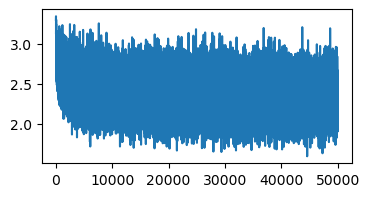

In [26]:
plt.figure(figsize=(4,2));
plt.plot(stepi, lossi);

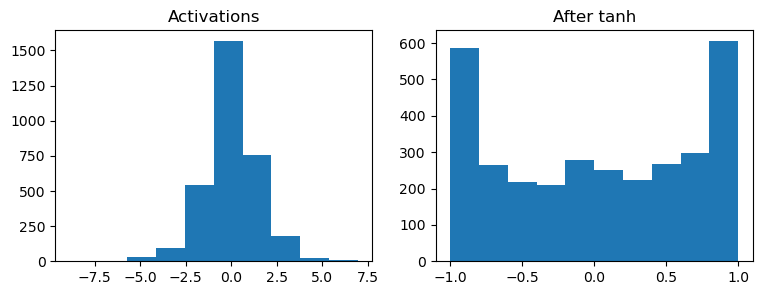

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(9,3))
axs[0].hist(hnorm.view(-1).detach().numpy());
axs[1].hist(h.view(-1).detach().numpy());

axs[0].set_title("Activations");
axs[1].set_title("After tanh");

In [28]:
# calculate loss 

@torch.no_grad()
def calc_loss(dataset):
    x,y = {'train': (x_train, y_train),
           'dev': (x_dev, y_dev),
           'test': (x_test, y_test)} [dataset]
    
    xenc = C[x].view(-1, emb_size * block_size)
    h = torch.tanh(xenc @ W1 + bnmean_running / torch.sqrt(bnvar_running))
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, y)
    print(dataset, loss.item())

In [29]:
calc_loss('train')

train 3.201066732406616


In [30]:
calc_loss('dev')

dev 3.1946511268615723


### torchifying the code:

Let's rewrite the code similar to pytorch's api and train with larger network.

In [31]:
class Linear:
    def __init__(self, fan_in, fan_out, bias=False):
        self.w = torch.randn(fan_in, fan_out) / fan_in**0.5
        self.b = torch.zeros(fan_out) if bias else None

    def __call__(self, x):
        out = x @ self.w
        if self.b:
            return out + self.b
        else:
            return out

    def parameters(self):
        return [self.w] + ([] if self.b is None else [self.b])

In [32]:
l1 = Linear(3,5)
x = torch.randn(2,3)
x.shape, l1(x).shape

(torch.Size([2, 3]), torch.Size([2, 5]))

In [33]:
l1.parameters()

[tensor([[ 0.7557,  0.3007,  0.1576, -0.3674, -0.1445],
         [ 0.3301,  0.1823,  0.0873, -0.1320, -0.2583],
         [-0.1434,  0.0366,  0.4915,  0.2270,  0.0598]])]

In [34]:
class Tanh:
    def __call__(self, x):
        return torch.tanh(x)
    def parameters(self):
        return []

In [35]:
t = Tanh()
t(x)

tensor([[ 0.3079,  0.6316, -0.1997],
        [ 0.8381, -0.9370,  0.8071]])

In [36]:
class BatchNorm1d:
    def __init__(self, nout, eps=1e-05, momentum=0.1):
        # nout is num neurons of prev linear layer
        self.eps = eps
        self.momentum = momentum
        self.training = True
        
        # free params to train
        self.gain = torch.ones(nout)
        self.bias = torch.zeros(nout)
        
        # keep for inference
        self.running_mean = torch.zeros(nout)
        self.running_var = torch.ones(nout)

    def __call__(self, x):
        if self.training:
            bnmeani = x.mean(dim=0, keepdim=True)
            bnvari = x.var(dim=0, keepdim=True)
        else:
            bnmeani = self.running_mean
            bnvari = self.running_var
            
        xi = (x - bnmeani) / torch.sqrt(self.eps + bnvari)
        out = self.gain * xi  + self.bias

        if self.training:
            with torch.no_grad():
                self.running_mean = (1 - self.momentum) * self.running_mean + self.momentum * bnmeani
                self.running_var =  (1 - self.momentum) * self.running_var  + self.momentum * bnvari

        return out

    def parameters(self):
        return [self.gain, self.bias]
        

In [37]:
bn = BatchNorm1d(5)
bn(l1(x))

tensor([[ 0.7070,  0.7067, -0.7071, -0.7070, -0.7071],
        [-0.7070, -0.7067,  0.7071,  0.7070,  0.7071]])

In [38]:
bn.parameters()

[tensor([1., 1., 1., 1., 1.]), tensor([0., 0., 0., 0., 0.])]

In [98]:
# prepare NN for training

emb_size = 3
n_hidden = 100

lossi = []
stepi = []

C = torch.randn((len(stoi), emb_size), )
layers = [Linear(block_size * emb_size, n_hidden), BatchNorm1d(n_hidden), Tanh(),
          Linear(n_hidden, n_hidden), BatchNorm1d(n_hidden), Tanh(),
          Linear(n_hidden, n_hidden), BatchNorm1d(n_hidden), Tanh(),
          Linear(n_hidden, n_hidden), BatchNorm1d(n_hidden), Tanh(),
          Linear(n_hidden, n_hidden), BatchNorm1d(n_hidden), Tanh(),
          Linear(n_hidden, len(stoi)), BatchNorm1d(len(stoi)),]

parameters = [C] + [p for layer in layers for p in layer.parameters()]
len(parameters)

for p in parameters:
    p.requires_grad = True

with torch.no_grad():
    # make last layer less confident
    layers[-1].gain *= 0.1

    # scale weights of linear layers

In [99]:
xs.shape, ys.shape

(torch.Size([32, 3]), torch.Size([32]))

In [100]:
max_steps = 200000
batch_size = 32

for i in range(max_steps):
    ixs = torch.randint(0, x_train.shape[0], (batch_size, ))
    xs = x_train[ixs]
    ys = y_train[ixs]
    
    xenc = C[xs]
    xin = xenc.view(-1, emb_size * block_size)
    for layer in layers:
        xin = layer(xin)
    loss = F.cross_entropy(xin, ys)
    for p in parameters:
        p.grad = None
    loss.backward()
    lr = 0.1 if i < 150000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad

    if i % 10000 == 0: # print every once in a while
        print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
    stepi.append(i)
    lossi.append(loss.log10().item())

      0/ 200000: 3.3184
  10000/ 200000: 2.2918
  20000/ 200000: 2.2971
  30000/ 200000: 2.3839
  40000/ 200000: 2.1117
  50000/ 200000: 2.6122
  60000/ 200000: 2.5618
  70000/ 200000: 2.3998
  80000/ 200000: 2.0350
  90000/ 200000: 2.0512
 100000/ 200000: 2.5447
 110000/ 200000: 1.9068
 120000/ 200000: 1.9693
 130000/ 200000: 2.0481
 140000/ 200000: 1.8466
 150000/ 200000: 2.4283
 160000/ 200000: 1.8406
 170000/ 200000: 2.2939
 180000/ 200000: 1.7709
 190000/ 200000: 1.5341
